<a href="https://colab.research.google.com/github/arad4228/BigData_and_A.I/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5(5%EC%9B%94_3%EC%9D%BC_%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단순히 numpy를 통한 학습

In [30]:
import numpy as np

In [31]:
N, Din, Dout = 64, 4,2

In [32]:
x = np.random.randn(N, Din)
y = np.random.randn(N, Dout)
w = np.random.randn(Din, Dout)

In [33]:
lr = 1e-5
loss_arr = []

In [34]:
for t in range(5000):
  y_pred = np.matmul(x,w)

  loss = (0.5*(y_pred - y)**2).sum()
  loss_arr.append(loss)

  grad_y_pred = (y_pred - y)
  grad_w = np.matmul(np.transpose(x),grad_y_pred)

  w -= lr * grad_w

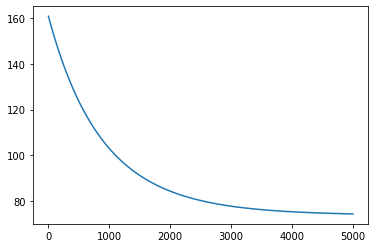

In [35]:
import matplotlib.pyplot as plt

plt.plot(loss_arr)

# pythorch를 통한 학습


In [37]:
import torch
device = torch.device('cpu')

N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device = device)
y = torch.randn(N, Dout, device = device)
w = torch.randn(Din,Dout, device = device)

In [38]:
lr = 1e-6
loss_arr2 = []

In [39]:
for t in range(5000):
  y_pred = x.mm(w)

  loss = 0.5* (y_pred - y).pow(2).sum()
  loss_arr2.append(loss)

  grad_y_pred = (y_pred - y)
  grad_w = x.t().mm(grad_y_pred)

  w -= lr * grad_w

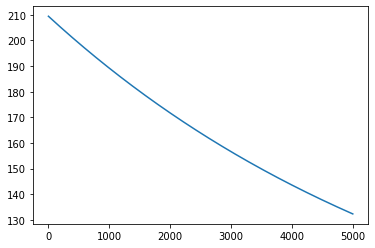

In [40]:
import matplotlib.pyplot as plt

plt.plot(loss_arr2)

# 개선(autograd)

In [50]:
import torch
device = torch.device('cpu')

N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device = device)
y = torch.randn(N, Dout, device = device)
w = torch.randn(Din,Dout, device = device, requires_grad=True)

In [51]:
lr = 1e-6

In [52]:
for t in range(5000):
  y_pred = x.mm(w)

  loss = 0.5 * (y_pred - y).pow(2).sum()

  loss.backward ()

  with torch.no_grad():
    w -= lr *w.grad
    w.grad.zero_()

# 개선 (nn library)

In [55]:
import torch
device = torch.device('cpu')

N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device = device)
y = torch.randn(N, Dout, device = device)

In [57]:
model = torch.nn.Sequential (
    torch.nn.Linear(Din, Dout))

In [58]:
lr = 1e-6

In [63]:
for t in range(5000):
  y_pred = model(x)

  loss = torch.nn.functional.mse_loss (y_pred, y)

  loss.backward ()

  with torch.no_grad():
    for param in model.parameters ():
      param -= lr * param.grad
    model.zero_grad()

# 개션 (Optimizer)

In [76]:
import torch
device = torch.device('cpu')

N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device = device)
y = torch.randn(N, Dout, device = device)

In [77]:
model = torch.nn.Sequential (
    torch.nn.Linear(Din, Dout))

In [78]:
lr = 1e-6

In [81]:
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

In [ ]:
for t in range(5000):
  y_pred = model(x)

  loss = torch.nn.functional.mse_loss (y_pred, y)

  loss.backward ()

 optimizer.step()
 optimizer.zero_grad()

# 개선 (nn.model, Model을 class로 정의)

In [ ]:
import torch

device = torch.device('cpu')

class MyOneLaterNet( torch.nn.Model ):
  def __init__(self, Din, Dout):
    super(MyOneLaterNet, self).__init__ ()
    self.linear = torch.nn.Linear(Din, Dout)

  def forward (self, x):
    y_pred = self.linear(x)
    return y_pred


In [89]:
N, Din, Dout = 64, 4, 2

x = torch.randn(N, Din, device = device)
y = torch.randn(N, Dout, device = device)

In [ ]:
model = MyOneLaterNet (Din, Dout)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-6)

In [ ]:
for t in range(5000):
  y_pred = model(x)

  loss = torch.nn.functional.mse_loss (y_pred, y)

  loss.backward ()

 optimizer.step()
 optimizer.zero_grad()

In [98]:
import numpy as np
import tensorflow as tf
N, Din, Dout = 64, 4, 2

In [ ]:
x = tf.placeholder(tf.float32, shape=(N, Din))
y = tf.placeholder(tf.float32, shape=(N, Dout))
w = tf.placeholder(tf.float32, shape=(Din, Dout))

In [ ]:
y_pred = tf.matmul(w,x)
diff = y_pred - y
loss = tf.reduce_mean
          (tf.reduce_sum (diff**2, axis=1))

grad_w = tf.gradients(loss, [w])


In [ ]:
with tf.Session() as Sess:
  values = {x: np.random.randn(N,Din),
            y: np.random.randn(N,Dout),
            w: np.random.randn(Din,Dout),}
  
  out = sess.run([loss, grad_w],
                 feed_dict=values)
  loss_val, grad_w_val = out